In [30]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv('Base_limpia.csv',encoding="iso-8859-1",dtype={'CustomerID':str}).drop('Unnamed: 0',axis=1)
print(df.shape)
df.head()

(399169, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [32]:
df['Semana']= pd.to_datetime(df.InvoiceDate).dt.date.map(lambda x:x.strftime('%U')).astype(int)
df['Ano']=pd.to_datetime(df.InvoiceDate).dt.year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010


In [33]:
df['w']=df.Ano.map(str) + df.Semana.map(lambda x: str(x) if x>=10 else '0{}'.format(x))
df['w']=df['w'].astype(int)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,201048
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,201048
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,201048


In [34]:
df[df.Ano==2010].w.value_counts()

201049    10814
201050     8039
201048     5001
201051     2357
Name: w, dtype: int64

In [35]:
201101-201051

50

In [36]:
df['w']= df.w.map(lambda x:x+49 if str(x)[:4]=='2010' else x).map(lambda x:x-201097)

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0


In [38]:
df['Importe']=df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Semana,Ano,w,Importe
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,48,2010,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,48,2010,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,48,2010,0,20.34


In [39]:
Ventas=df[['InvoiceNo','w','Importe','CustomerID']].groupby(['InvoiceNo','w','CustomerID']).sum().reset_index()
aux1=df[df.Importe>0][['InvoiceNo','w','Importe','CustomerID']].groupby(['w','InvoiceNo','CustomerID']).sum().reset_index()
aux2=df[df.Importe>0][['StockCode','w','Importe']].groupby(['w','StockCode']).count().reset_index()

In [40]:
{'x1':'No_ventas', 'x2':'Venta_promedio', 'x3':'Tasa_devueltos', 'x4':'No_clientes_recurrentes', 'x5':'No_articulos_recurrentes'}

{'x1': 'No_ventas',
 'x2': 'Venta_promedio',
 'x3': 'Tasa_devueltos',
 'x4': 'No_clientes_recurrentes',
 'x5': 'No_articulos_recurrentes'}

In [153]:
t = pd.DataFrame(range(53),columns=['w'])
for k in range(4):
    #hacia atras    
    t['x1_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe>0) & (Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x2_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].Importe.std())
    t['x3_%d'%(k+1)]=t.w.map(lambda x:Ventas[(Ventas.Importe<0)&(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0]/ Ventas[(Ventas.w<=x)&(Ventas.w>=x-k)].shape[0])
    t['x4_%d'%(k+1)]=t.w.map(lambda x:(aux1[(aux1.w<=x)&(aux1.w>=x-k)][['CustomerID','Importe']].groupby('CustomerID').count().Importe>1)
                    .astype(int).sum())
    t['x5_%d'%(k+1)]=t.w.map(lambda x:(aux2[(aux2.w<=x)&(aux2.w>=x-k)].Importe>1).astype(int).sum())
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x1_3,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4
0,0,312,483.680055,0.098266,33,894,312,483.680055,0.098266,33,...,312,483.680055,0.098266,33,894,312,483.680055,0.098266,33,894
1,1,529,524.068853,0.148148,63,1340,841,509.732998,0.130300,119,...,841,509.732998,0.130300,119,2234,841,509.732998,0.130300,119,2234
2,2,423,479.672688,0.220994,47,1238,952,503.739772,0.182131,170,...,1264,499.069839,0.162914,238,3472,1264,499.069839,0.162914,238,3472
3,3,124,714.150931,0.287356,18,461,547,545.397998,0.237099,77,...,1076,535.553700,0.195815,194,3039,1388,525.199913,0.175772,262,3933
4,4,175,714.960559,0.211712,11,817,299,716.633424,0.244949,38,...,722,591.573713,0.231097,111,2516,1251,565.495947,0.198077,241,3856


In [154]:
aux=Ventas[['w','Importe']].groupby('w').sum().reset_index()
t['w0']=t.w + 2
t = t.merge(aux,left_on=['w0'],right_on=['w'],how='left')
t.drop(['w0','w_y'],axis=1,inplace=True)
t.rename(columns={'Importe':'target','w_x':'w'},inplace=True)
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,0,312,483.680055,0.098266,33,894,312,483.680055,0.098266,33,...,483.680055,0.098266,33,894,312,483.680055,0.098266,33,894,162255.17
1,1,529,524.068853,0.148148,63,1340,841,509.732998,0.130300,119,...,509.732998,0.130300,119,2234,841,509.732998,0.130300,119,2234,48884.11
2,2,423,479.672688,0.220994,47,1238,952,503.739772,0.182131,170,...,499.069839,0.162914,238,3472,1264,499.069839,0.162914,238,3472,91306.23
3,3,124,714.150931,0.287356,18,461,547,545.397998,0.237099,77,...,535.553700,0.195815,194,3039,1388,525.199913,0.175772,262,3933,122321.59
4,4,175,714.960559,0.211712,11,817,299,716.633424,0.244949,38,...,591.573713,0.231097,111,2516,1251,565.495947,0.198077,241,3856,90559.22


In [155]:
t=t[(t.w>=3)&(t.w<=50)].reset_index(drop=True)
t.target=t.target.map(np.log)
t.head()

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
0,3,124,714.150931,0.287356,18,461,547,545.397998,0.237099,77,...,535.553700,0.195815,194,3039,1388,525.199913,0.175772,262,3933,11.714409
1,4,175,714.960559,0.211712,11,817,299,716.633424,0.244949,38,...,591.573713,0.231097,111,2516,1251,565.495947,0.198077,241,3856,11.413759
2,5,252,1182.117524,0.179153,16,942,427,1011.856314,0.192817,47,...,947.935107,0.216216,75,2220,974,779.875155,0.218299,167,3458,11.537845
3,6,200,883.884416,0.200000,17,883,452,1057.958230,0.188510,49,...,972.249861,0.195122,79,2642,751,931.113994,0.211962,103,3103,11.542943
4,7,268,404.268216,0.195195,17,977,468,654.371106,0.197256,41,...,873.125736,0.191011,92,2802,895,843.928618,0.195144,129,3619,11.275626


In [156]:
t.describe(percentiles=[0.01,0.02,0.05,0.95,0.99])

,w,x1_1,x2_1,x3_1,x4_1,x5_1,x1_2,x2_2,x3_2,x4_2,...,x2_3,x3_3,x4_3,x5_3,x1_4,x2_4,x3_4,x4_4,x5_4,target
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,26.50,331.125000,775.196833,0.162480,32.020833,1099.062500,657.916667,799.341354,0.162404,81.541667,...,811.596663,0.162219,140.750000,3270.520833,1300.062500,818.661948,0.162117,208.208333,4337.375000,11.871633
std,14.00,113.490205,345.536743,0.039390,14.028072,276.823272,202.851359,300.219119,0.028679,32.520997,...,264.437005,0.023106,51.518433,710.182925,329.414206,232.597145,0.020308,67.714972,897.487335,0.361369
min,3.00,124.000000,341.857012,0.088150,11.000000,461.000000,299.000000,375.573454,0.114720,38.000000,...,389.192323,0.120370,75.000000,2220.000000,751.000000,410.266012,0.124453,103.000000,3103.000000,11.036240
1%,3.47,147.500000,371.190278,0.097257,11.000000,556.880000,359.160000,376.813836,0.117833,39.410000,...,397.605613,0.125229,76.880000,2359.120000,818.680000,411.727786,0.129009,111.930000,3269.850000,11.148751
2%,3.94,171.000000,400.523544,0.106364,11.000000,652.760000,419.320000,378.054218,0.120946,40.820000,...,406.018903,0.130088,78.760000,2498.240000,886.360000,413.189561,0.133565,120.860000,3436.700000,11.261263
5%,5.35,179.200000,406.465024,0.120328,16.000000,718.550000,446.150000,442.543932,0.128883,46.350000,...,454.406546,0.134688,84.400000,2540.350000,948.600000,529.233791,0.137534,131.800000,3527.000000,11.342620
50%,26.50,313.500000,704.504350,0.156060,30.500000,1028.000000,593.500000,711.802108,0.156879,74.000000,...,744.701071,0.157738,129.000000,3043.500000,1221.500000,786.394462,0.161092,197.500000,4067.000000,11.830718
95%,47.65,577.000000,1412.831301,0.228321,61.200000,1616.250000,1052.900000,1354.461728,0.212850,139.650000,...,1346.990705,0.203018,224.950000,4692.400000,1897.100000,1308.372506,0.202858,314.550000,6232.300000,12.447012
99%,49.53,641.070000,1813.673179,0.286841,68.000000,1694.020000,1275.360000,1725.051192,0.241260,188.650000,...,1521.956895,0.224103,318.790000,4960.190000,2305.940000,1358.042029,0.215320,441.330000,6506.300000,12.474314


In [157]:
X=t[[x for x in t.columns if x not in ['w','target']]].copy()
Y=t[['target']].copy()

In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
import numpy as np

In [159]:
sc=MinMaxScaler()
Xs=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [181]:
Xt, Xv, yt, yv = train_test_split(Xs,Y,train_size=0.7)

In [169]:
modelo1=LinearRegression()
modelo2= PassiveAggressiveRegressor()
modelo3=SVR()
modelo4=MLPRegressor(solver='lbfgs')

In [182]:
modelo1.fit(Xt,yt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
print(mean_absolute_error(y_pred=modelo1.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo1.predict(Xv),y_true=yv))

0.16193441252198865
0.39329126691592187


In [184]:
param = dict(C=np.arange(0,20,0.1))
grid = GridSearchCV(param_grid=param,cv=3,estimator=modelo2,n_jobs=-1,
                    error_score='mean_absolute_error',verbose=True)
grid.fit(Xt,yt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.0s finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='mean_absolute_error',
             estimator=PassiveAggressiveRegressor(C=1.0, average=False,
                                                  early_stopping=False,
                                                  epsilon=0.1,
                                                  fit_intercept=True,
                                                  loss='epsilon_insensitive',
                                                  max_iter=1000,
                                                  n_iter_no_change=5,
                                                  random_state=None,
                                                  shuffle=True, tol=0.001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_gri...
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.

In [185]:
grid.best_score_, grid.best_params_

(-0.5386468207040048, {'C': 0.30000000000000004})

In [186]:
modelo_pasivo=grid.best_estimator_.fit(Xt,yt)

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [187]:
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_pasivo.predict(Xv),y_true=yv))

0.283111034589664
0.29487538033991345


In [193]:
param2 = dict(C=np.arange(0,100,.1),kernel=['poly', 'rbf'])
grid2 = GridSearchCV(param_grid=param2,cv=3,estimator=modelo3,n_jobs=-1,
                    verbose=True)
grid2.fit(Xt,yt)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   34.4s finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3...
       94.6, 94.7, 94.8, 94.9, 95. , 95.1, 95.2, 95.3, 95.4, 95.5, 95.6,
       95.7, 95.8, 95.9, 96. , 96.1, 96.2, 96.3, 96.4, 96.5, 96.6, 96.7,
       96.8, 96.9, 97. , 97.1, 97.2, 97.3, 97.4, 97.5, 97.6, 97.7, 97.8,
       97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5, 98.6, 98.7, 98.8, 98.9,
       99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.7, 99.8, 99.9]),
                         'kernel': ['poly', 'rbf']},
             pr

In [195]:
grid2.best_score_, grid2.best_params_

(0.1695469509705243, {'C': 0.2, 'kernel': 'rbf'})

In [202]:
modelo_SVR=grid2.best_estimator_.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_SVR.predict(Xv),y_true=yv))

0.18719814603854845
0.1918705715840673


/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
param3 = dict(hidden_layer_sizes = [(a,b,c,) for a in range(3,8) for b in range(3,8) for c in range(3,8)],
activation = ['identity', 'logistic', 'tanh', 'relu'],
learning_rate = ['constant', 'invscaling', 'adaptive'])
grid3 = GridSearchCV(param_grid=param3,cv=3,estimator=modelo4,n_jobs=-1,
                    verbose=True,error_score='mean_absolute_score')
grid3.fit(Xt,yt)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  7.1min finished
/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_

GridSearchCV(cv=3, error_score='mean_absolute_score',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t...
                                                (3, 3, 6), (3, 3, 7), (3, 4, 3),
                                                (3, 4, 4), (3, 4, 5), (3, 4, 6),
                                                (3, 4, 7), (3, 5, 3), (3, 5, 4),
                                                (3, 5, 5), (3, 5, 6), (3, 5, 7),
    

In [212]:
grid3.best_score_, grid3.best_params_

(0.2427514697255814,
 {'activation': 'tanh',
  'hidden_layer_sizes': (6, 7, 3),
  'learning_rate': 'invscaling'})

In [226]:
modelo_MLPR=grid3.best_estimator_.fit(Xt,yt)
print(mean_absolute_error(y_pred=modelo_MLPR.predict(Xt),y_true=yt))
print(mean_absolute_error(y_pred=modelo_MLPR.predict(Xv),y_true=yv))

0.1598852539471264
0.16761317476541132


/home/paco/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
Y['y^1']=modelo_pasivo.predict(Xs)
Y['y^2']=modelo_SVR.predict(Xs)
Y['y^3']=modelo_MLPR.predict(Xs)

In [228]:
Y.sample(10)

,target,y^1,y^2,y^3
3,11.542943,11.360693,11.621548,11.631123
31,11.925713,11.711830,11.925026,11.926908
23,11.713411,11.549565,11.834446,11.630833
38,12.460752,12.009570,12.197017,12.354175
15,11.036240,11.577780,11.827120,11.630934
17,12.097349,11.506291,11.893634,11.630972
37,12.228692,11.933106,12.074156,12.365472
0,11.714409,11.657781,11.812856,11.630451
43,12.473535,11.878379,12.278386,12.351979
12,11.555572,11.621915,11.786304,11.630450


In [229]:
import seaborn as sns

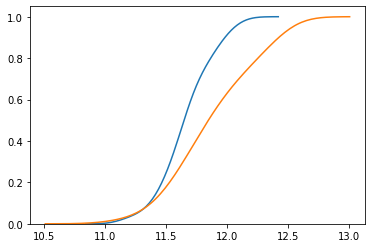

In [230]:
sns.distplot(Y[['y^1']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

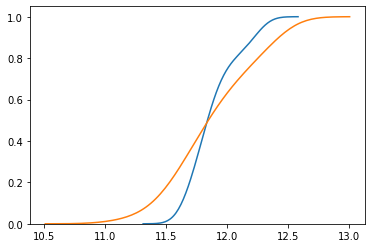

In [231]:
sns.distplot(Y[['y^2']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

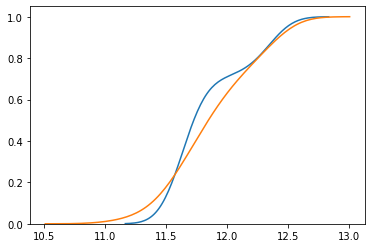

In [232]:
sns.distplot(Y[['y^3']],hist=False,kde_kws={'cumulative':True})
sns.distplot(Y[['target']],hist=False,kde_kws={'cumulative':True})

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [143]:
sk = SelectKBest(f_regression,k=7) 
sk.fit(Xt,yt)
[a for a,b in zip(Xt.columns,sk.get_support()) if b]

/home/paco/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['x5_1', 'x1_2', 'x5_2', 'x1_3', 'x5_3', 'x1_4', 'x5_4']